In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import joblib
import math
from sklearn.exceptions import FitFailedWarning

# Ignorar warnings de ajuste (fit) en modelos de sklearn
import warnings
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [2]:
# Empresas chilenas en yahoo-finance
empresas_chilenas = [
    'SECURITY.SN', 'SQM-B.SN', 'LTM.SN', 'CMPC.SN', 'CHILE.SN', 'ENTEL.SN', 'ENELAM.SN', 'IAM.SN',
    'BSANTANDER.SN', 'VAPORES.SN', 'PARAUCO.SN', 'CCU.SN', 'MALLPLAZA.SN', 'SONDA.SN', 'COLBUN.SN', 'FALABELLA.SN',
    'ANDINA-B.SN', 'CONCHATORO.SN', 'BCI.SN', 'COPEC.SN', 'RIPLEY.SN', 'ILC.SN', 'CAP.SN', 'AGUAS-A.SN', 'ECL.SN',
    'CENCOSUD.SN', 'ENELCHILE.SN'
]

In [3]:
# Obtener datos de las empresas en el período específico
start_date = '2021-01-01'
end_date = '2022-12-30'

In [4]:
# Crear DataFrame para almacenar datos
data = pd.DataFrame()

In [5]:
# Obtener datos de las empresas
for x in empresas_chilenas:
    stock = yf.Ticker(x)
    precio_cierre = stock.history(start=start_date, end=end_date)['Close']
    data[x] = precio_cierre

# Calcular los retornos
data_retorno = data.pct_change().dropna()

In [6]:
# Seleccionar las 'n_empresas' con mejor rendimiento
n_empresas = 15

In [7]:
# Filtrar empresas que tengan rendimientos disponibles
empresas_con_rendimientos = data_retorno.mean().dropna().index

In [8]:
# Tomar las 'n_empresas' primeras empresas con mejor rendimiento ponderado
acciones_mejor_rendimiento = data_retorno[empresas_con_rendimientos].mean().sort_values(ascending=False).head(n_empresas)

In [9]:
# Mostrar las 'n_empresas' acciones con mejor rendimiento ponderado
print(f"\nLas {n_empresas} acciones con mejor rendimiento ponderado:")
print(acciones_mejor_rendimiento)


Las 15 acciones con mejor rendimiento ponderado:
LTM.SN           0.003285
VAPORES.SN       0.002107
SQM-B.SN         0.001824
SECURITY.SN      0.000978
CENCOSUD.SN      0.000886
CCU.SN           0.000775
ANDINA-B.SN      0.000716
CHILE.SN         0.000682
CAP.SN           0.000496
ENTEL.SN         0.000450
MALLPLAZA.SN     0.000279
BSANTANDER.SN    0.000272
AGUAS-A.SN       0.000263
BCI.SN           0.000255
PARAUCO.SN       0.000242
dtype: float64


In [10]:
# Seleccionar las 'n_empresas' con mejor rendimiento
portafolio = acciones_mejor_rendimiento.index.tolist()

In [11]:
# Mostrar datos
print(f"\nEmpresas seleccionadas para el portafolio ({n_empresas}):")
print(portafolio)


Empresas seleccionadas para el portafolio (15):
['LTM.SN', 'VAPORES.SN', 'SQM-B.SN', 'SECURITY.SN', 'CENCOSUD.SN', 'CCU.SN', 'ANDINA-B.SN', 'CHILE.SN', 'CAP.SN', 'ENTEL.SN', 'MALLPLAZA.SN', 'BSANTANDER.SN', 'AGUAS-A.SN', 'BCI.SN', 'PARAUCO.SN']


In [12]:
# Obtener precios y retornos de acciones
stock_precio = data[portafolio]
stock_retorno = stock_precio.pct_change().dropna()

In [13]:
# Calcular rendimientos esperados y riesgos
esperados_stock_retorno = stock_retorno.mean()
stock_riesgo_individual = stock_retorno.std()

In [14]:
# Obtener matriz de covarianza
stock_retorno_esperados_cov_matriz = stock_retorno.cov()

In [15]:
# Mostrar datos
print("Rendimientos esperados:")
print(esperados_stock_retorno)

Rendimientos esperados:
LTM.SN           0.003285
VAPORES.SN       0.002107
SQM-B.SN         0.001824
SECURITY.SN      0.000978
CENCOSUD.SN      0.000886
CCU.SN           0.000775
ANDINA-B.SN      0.000716
CHILE.SN         0.000682
CAP.SN           0.000496
ENTEL.SN         0.000450
MALLPLAZA.SN     0.000279
BSANTANDER.SN    0.000272
AGUAS-A.SN       0.000263
BCI.SN           0.000255
PARAUCO.SN       0.000242
dtype: float64


In [16]:
print("Riesgo individual:")
print(stock_riesgo_individual)

Riesgo individual:
LTM.SN           0.196415
VAPORES.SN       0.028021
SQM-B.SN         0.029876
SECURITY.SN      0.021105
CENCOSUD.SN      0.021813
CCU.SN           0.019332
ANDINA-B.SN      0.018821
CHILE.SN         0.017138
CAP.SN           0.030846
ENTEL.SN         0.023709
MALLPLAZA.SN     0.023786
BSANTANDER.SN    0.018899
AGUAS-A.SN       0.023680
BCI.SN           0.021410
PARAUCO.SN       0.025672
dtype: float64


In [17]:
print("Matriz de covarianza de rendimientos de activos:")
display(stock_retorno_esperados_cov_matriz)

Matriz de covarianza de rendimientos de activos:


,LTM.SN,VAPORES.SN,SQM-B.SN,SECURITY.SN,CENCOSUD.SN,CCU.SN,ANDINA-B.SN,CHILE.SN,CAP.SN,ENTEL.SN,MALLPLAZA.SN,BSANTANDER.SN,AGUAS-A.SN,BCI.SN,PARAUCO.SN
LTM.SN,0.038579,0.000065,0.000595,0.000031,-0.000063,-0.000147,0.000006,0.000079,-0.000186,0.000126,-0.000042,0.000208,0.000273,-0.000007,0.000358
VAPORES.SN,0.000065,0.000785,0.000202,0.000146,0.000112,0.000117,0.000115,0.000100,0.000246,0.000178,0.000106,0.000165,0.000152,0.000174,0.000127
SQM-B.SN,0.000595,0.000202,0.000893,0.000120,0.000182,0.000129,0.000114,0.000141,0.000227,0.000143,0.000137,0.000175,0.000174,0.000170,0.000189
SECURITY.SN,0.000031,0.000146,0.000120,0.000445,0.000166,0.000080,0.000143,0.000138,0.000148,0.000153,0.000199,0.000159,0.000184,0.000174,0.000193
CENCOSUD.SN,-0.000063,0.000112,0.000182,0.000166,0.000476,0.000102,0.000163,0.000175,0.000215,0.000148,0.000214,0.000192,0.000201,0.000218,0.000251
CCU.SN,-0.000147,0.000117,0.000129,0.000080,0.000102,0.000374,0.000076,0.000090,0.000142,0.000118,0.000095,0.000112,0.000103,0.000133,0.000124
ANDINA-B.SN,0.000006,0.000115,0.000114,0.000143,0.000163,0.000076,0.000354,0.000122,0.000143,0.000150,0.000171,0.000144,0.000129,0.000147,0.000178
CHILE.SN,0.000079,0.000100,0.000141,0.000138,0.000175,0.000090,0.000122,0.000294,0.000182,0.000164,0.000176,0.000226,0.000171,0.000215,0.000191
CAP.SN,-0.000186,0.000246,0.000227,0.000148,0.000215,0.000142,0.000143,0.000182,0.000951,0.000168,0.000230,0.000196,0.000202,0.000211,0.000278
ENTEL.SN,0.000126,0.000178,0.000143,0.000153,0.000148,0.000118,0.000150,0.000164,0.000168,0.000562,0.000152,0.000172,0.000174,0.000212,0.000206


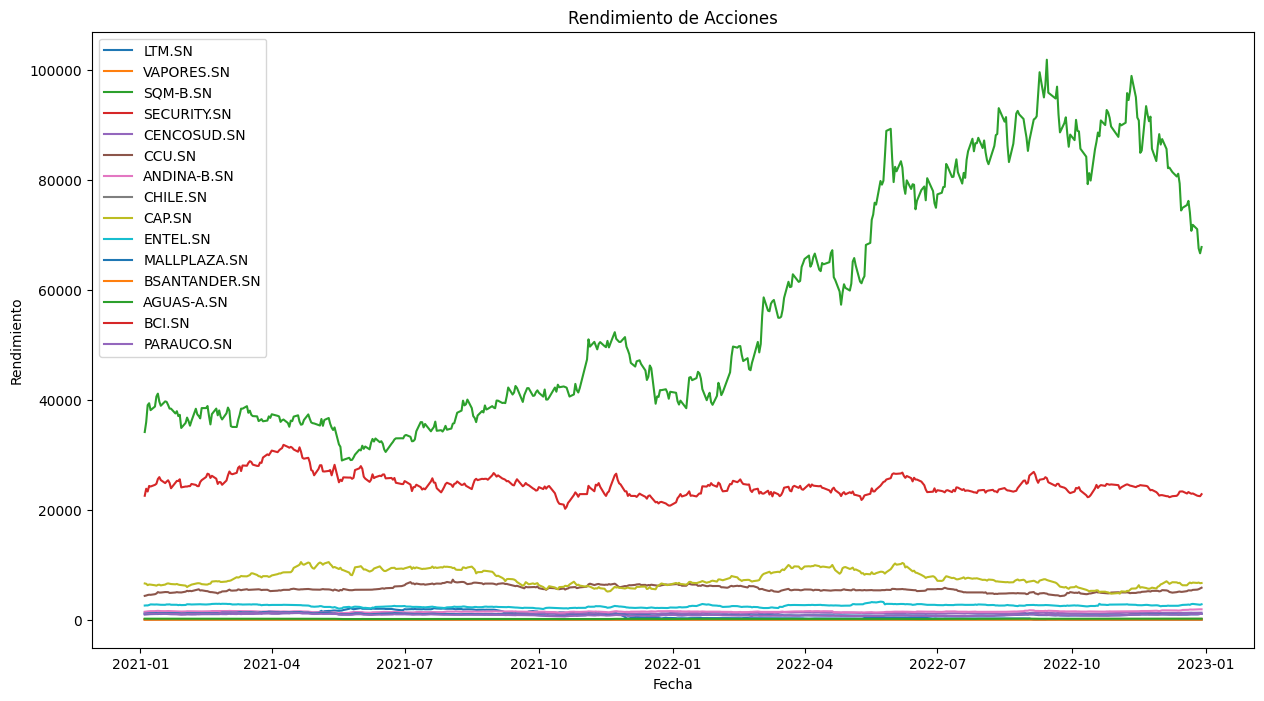

In [18]:
# Función para graficar series temporales
def graficar_series_temporales(data, columnas, max_acciones=15):
    num_acciones = min(max_acciones, len(columnas))
    plt.figure(figsize=(15, 8))
    for accion in columnas[:num_acciones]:
        plt.plot(data.index, data[accion], label=accion)
    plt.title('Rendimiento de Acciones')
    plt.xlabel('Fecha')
    plt.ylabel('Rendimiento')
    plt.legend()
    plt.show()

# Graficar series temporales
graficar_series_temporales(stock_precio, portafolio)

In [19]:
# Función para calcular el portafolio sub-óptimo de Markowitz
def portafolio_suboptimo_inversiones(portafolio):
    return np.ones(len(portafolio)) / len(portafolio)

portafolio = portafolio[:len(stock_retorno.columns)]

In [20]:
# Ejecutar la función para el portafolio sub-óptimo
sub_optimo_portafolio = portafolio_suboptimo_inversiones(portafolio)

# Tratamiento en np para operaciones posteriores
sub_optimo_portafolio = np.expand_dims(sub_optimo_portafolio, axis=0)

# Calcular rendimiento, varianza y riesgo del portafolio sub-óptimo
rendimiento_suboptimo = np.dot(sub_optimo_portafolio, esperados_stock_retorno)
varianza_suboptima = np.dot(sub_optimo_portafolio, np.dot(stock_retorno_esperados_cov_matriz, sub_optimo_portafolio.T))
riesgo_suboptimo = math.sqrt(varianza_suboptima)

# Mostrar datos del portafolio sub-óptimo
print('Portafolio sub-óptimo de Markowitz:')
print(f'Rendimiento esperado: {rendimiento_suboptimo[0] * 100:.2f}%')
print(f'Varianza: {varianza_suboptima[0, 0] * 100:.2f}%')
print(f'Riesgo del portafolio: {riesgo_suboptimo * 100:.2f}%')

Portafolio sub-óptimo de Markowitz:
Rendimiento esperado: 0.09%
Varianza: 0.04%
Riesgo del portafolio: 1.88%


In [21]:
from pypfopt import expected_returns
from pypfopt import EfficientFrontier
from pypfopt import risk_models

# Modelo Markowitz para el portafolio óptimo
# Calcular los rendimientos y riesgos esperados usando pypfopt

mu = expected_returns.mean_historical_return(stock_precio)
S = risk_models.sample_cov(stock_precio)
ef = EfficientFrontier(mu, S, weight_bounds=(0, 1))
ratios = ef.min_volatility()
ratio_limpio = pd.Series(ratios)
ratio_limpio.index = portafolio # type: ignore
portafolio_optimo = np.expand_dims(ratio_limpio, axis=0)

# Limitar a dos cifras significativas en las ponderaciones
ratio_limpio = ratio_limpio.round(4)
portafolio_optimo = np.expand_dims(ratio_limpio, axis=0)

# Calcular rendimiento, varianza y riesgo del portafolio óptimo
retorno_esperado_optimo = np.dot(portafolio_optimo, mu)[0]
portafolio_optimo_var = np.dot(portafolio_optimo, np.dot(S, portafolio_optimo.transpose()))[0, 0]
portafolio_optimo_riesgo = math.sqrt(portafolio_optimo_var)

# Mostrar datos del portafolio óptimo
print('\nPortafolio óptimo de Markowitz:')
print(f'Rendimiento esperado: {retorno_esperado_optimo * 100:.2f}%')
print(f'Varianza: {portafolio_optimo_var * 100:.2f}%')
print(f'Riesgo del portafolio: {portafolio_optimo_riesgo * 100:.2f}%')


Portafolio óptimo de Markowitz:
Rendimiento esperado: 17.29%
Varianza: 4.05%
Riesgo del portafolio: 20.14%


In [22]:
# Mostrar la asignación de ponderaciones en cada activo
print('\nDe la inversión total, el modelo sugiere invertir las siguientes proporciones en cada activo:')
display(ratio_limpio * 100)


De la inversión total, el modelo sugiere invertir las siguientes proporciones en cada activo:


LTM.SN            0.37
VAPORES.SN        6.02
SQM-B.SN          2.99
SECURITY.SN      10.50
CENCOSUD.SN       3.62
CCU.SN           24.92
ANDINA-B.SN      19.48
CHILE.SN         23.20
CAP.SN            0.00
ENTEL.SN          3.18
MALLPLAZA.SN      2.39
BSANTANDER.SN     0.00
AGUAS-A.SN        3.34
BCI.SN            0.00
PARAUCO.SN        0.00
dtype: float64

In [23]:
# Supongamos que ya tienes el DataFrame 'ratio_limpio' con las ponderaciones base
# Define las ponderaciones base obtenidas del portafolio óptimo de Markowitz
ponderaciones_base = ratio_limpio

# Define las ponderaciones para cada perfil de riesgo
ponderaciones_agresivo = ponderaciones_base * 1.2  # Ajuste para un perfil agresivo
ponderaciones_moderado = ponderaciones_base * 1.0  # Sin cambios para un perfil moderado
ponderaciones_conservador = ponderaciones_base * 0.8  # Ajuste para un perfil conservador

# Dependiendo del perfil de riesgo del cliente, selecciona las ponderaciones adecuadas
perfil_riesgo_cliente = 'agresivo'  # Puedes cambiar esto según el perfil del cliente

if perfil_riesgo_cliente == 'agresivo':
    ponderaciones_cliente = ponderaciones_agresivo
elif perfil_riesgo_cliente == 'moderado':
    ponderaciones_cliente = ponderaciones_moderado
elif perfil_riesgo_cliente == 'conservador':
    ponderaciones_cliente = ponderaciones_conservador
else:
    raise ValueError("Perfil de riesgo no válido")


In [24]:
# Muestra las ponderaciones para cada perfil de riesgo
print("Ponderaciones ajustadas para un perfil AGRESIVO:")
print(ponderaciones_agresivo)


Ponderaciones ajustadas para un perfil AGRESIVO:
LTM.SN           0.00444
VAPORES.SN       0.07224
SQM-B.SN         0.03588
SECURITY.SN      0.12600
CENCOSUD.SN      0.04344
CCU.SN           0.29904
ANDINA-B.SN      0.23376
CHILE.SN         0.27840
CAP.SN           0.00000
ENTEL.SN         0.03816
MALLPLAZA.SN     0.02868
BSANTANDER.SN    0.00000
AGUAS-A.SN       0.04008
BCI.SN           0.00000
PARAUCO.SN       0.00000
dtype: float64


In [25]:
print("\nPonderaciones ajustadas para un perfil MODERADO:")
print(ponderaciones_moderado)


Ponderaciones ajustadas para un perfil MODERADO:
LTM.SN           0.0037
VAPORES.SN       0.0602
SQM-B.SN         0.0299
SECURITY.SN      0.1050
CENCOSUD.SN      0.0362
CCU.SN           0.2492
ANDINA-B.SN      0.1948
CHILE.SN         0.2320
CAP.SN           0.0000
ENTEL.SN         0.0318
MALLPLAZA.SN     0.0239
BSANTANDER.SN    0.0000
AGUAS-A.SN       0.0334
BCI.SN           0.0000
PARAUCO.SN       0.0000
dtype: float64


In [26]:
print("\nPonderaciones ajustadas para un perfil CONSERVADOR:")
print(ponderaciones_conservador)


Ponderaciones ajustadas para un perfil CONSERVADOR:
LTM.SN           0.00296
VAPORES.SN       0.04816
SQM-B.SN         0.02392
SECURITY.SN      0.08400
CENCOSUD.SN      0.02896
CCU.SN           0.19936
ANDINA-B.SN      0.15584
CHILE.SN         0.18560
CAP.SN           0.00000
ENTEL.SN         0.02544
MALLPLAZA.SN     0.01912
BSANTANDER.SN    0.00000
AGUAS-A.SN       0.02672
BCI.SN           0.00000
PARAUCO.SN       0.00000
dtype: float64


In [27]:
# Simulación de rendimientos y riesgos
num_simulaciones = 100
simulaciones = np.random.multivariate_normal(mu, S, num_simulaciones)
simulacion_rendimientos = np.dot(simulaciones, portafolio_optimo.transpose())
simulacion_riesgos = np.std(simulaciones, axis=1)

In [28]:
# Crear DataFrame con simulaciones
df = pd.DataFrame({
    'Rendimientos': simulacion_rendimientos.ravel(),
    'Riesgos': simulacion_riesgos.ravel(),
})

In [29]:
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error

# Calcular y mostrar métricas adicionales (Sharpe Ratio, R2, MAE)
sharpe_ratio_optimo = (retorno_esperado_optimo - 0.09) / portafolio_optimo_riesgo
r2_optimo = np.corrcoef(simulacion_rendimientos.flatten(), df['Rendimientos'].values.flatten())[0, 1] ** 2 # type: ignore
mae_optimo = median_absolute_error(simulacion_rendimientos.flatten(), df['Rendimientos'].values.flatten()) # type: ignore

print('\nMétricas adicionales del portafolio óptimo:')
print(f'Sharpe Ratio: {sharpe_ratio_optimo:.4f}')
print(f'R2: {r2_optimo:.4f}')
print(f'MAE: {mae_optimo:.4f}')


Métricas adicionales del portafolio óptimo:
Sharpe Ratio: 0.4117
R2: 1.0000
MAE: 0.0000


In [30]:
# Serializar resultados obtenidos
joblib.dump((mu, S, ratio_limpio), 'resultados_markowitz.joblib')

['resultados_markowitz.joblib']

In [31]:
# Cargar resultados serializados
mu, S, ratio_limpio = joblib.load('resultados_markowitz.joblib')

In [32]:
# Crear variable objetivo (0: Bajo, 1: Alto) usando la mediana
df['Clasificacion'] = np.where(df['Rendimientos'] > df['Rendimientos'].median(), 1, 0)
df.head(10)

,Rendimientos,Riesgos,Clasificacion
0,0.310240,1.308235,1
1,0.043491,0.366240,0
2,0.055018,0.458933,0
3,0.340075,0.739690,1
4,0.214136,0.407079,1
5,0.580569,0.752090,1
6,0.146509,0.423935,0
7,0.251652,1.074083,1
8,0.541781,0.311900,1
9,0.462562,1.745816,1


In [33]:
from sklearn.model_selection import train_test_split

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X = df[['Rendimientos', 'Riesgos']]
y = df['Clasificacion']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [34]:
# Grilla de hiperparámetros para modelos de ML
parametros_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

parametros_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

parametros_svr = {
    'C': [0.001, 0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

In [35]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LogisticRegression

# Modelos de regresión con grillas de hiperparámetros

modelos = {
    'Regresión Lineal': (LogisticRegression(), parametros_lr),
    'RandomForestRegressor': (RandomForestRegressor(), parametros_rf),
    'SVR': (SVR(), parametros_svr)
}


In [36]:
# Definir las métricas para modelos de regresión
metricas_regresion = {
    'MAE': median_absolute_error,
    'MSE': mean_squared_error,
    'RMSE': lambda y_true, y_pred: np.sqrt(mean_squared_error(y_true, y_pred)),
    'R2 Score': r2_score
}

In [37]:
# Evaluar y mostrar métricas para cada modelo
from sklearn.model_selection import GridSearchCV


for model_name, (model, params) in modelos.items():
    try:
        # Buscar los mejores hiperparámetros usando GridSearchCV
        mejor_modelo = GridSearchCV(model, params, cv=5)
        mejor_modelo.fit(X_train, y_train)

        # Entrenar modelo con mejores hiperparámetros
        model.set_params(**mejor_modelo.best_params_)
        model.fit(X_train, y_train)

        # Mostrar información sobre las métricas
        print(f"\nMétricas para {model_name}:")

        if isinstance(model, RandomForestRegressor):
            # Métricas específicas para RandomForestRegressor
            feature_importances = model.feature_importances_
            print(f"Feature Importances: {feature_importances}")

        for metric_name, metric_function in metricas_regresion.items():
            # Calcular métrica
            y_test_pred = model.predict(X_test)
            metric_value = metric_function(y_test, y_test_pred)

            # Mostrar resultado
            print(f"{metric_name}: {metric_value:.4f}")

            if metric_name == 'R2 Score' and isinstance(model, LogisticRegression):
                # Calcular R2 Ajustado para la regresión logística
                n = len(X_test)
                p = X_test.shape[1]
                r2_ajustado = 1 - (1 - metric_value) * (n - 1) / (n - p - 1)
                print(f"R2 Ajustado: {r2_ajustado:.4f}")
    except Exception as e:
        print(f"Error en el modelo {model_name}: {e}")


c:\Users\56953\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [       nan 0.53736264        nan 0.53736264        nan 0.61208791
        nan 0.87912088        nan 0.96923077]
  warnings.warn(



Métricas para Regresión Lineal:
MAE: 0.0000
MSE: 0.0606
RMSE: 0.2462
R2 Score: 0.7519
R2 Ajustado: 0.7353

Métricas para RandomForestRegressor:
Feature Importances: [1. 0.]
MAE: 0.0000
MSE: 0.0548
RMSE: 0.2342
R2 Score: 0.7755

Métricas para SVR:
MAE: 0.1255
MSE: 0.0416
RMSE: 0.2041
R2 Score: 0.8295


In [38]:
# Se obtienen los datos del año en curso para la validación de las predicciones
fecha_inicio_prediccion = '2023-01-02'
fecha_fin_prediccion = '2023-11-30'

stock_precio_prediccion = pd.DataFrame()

for x in portafolio:
    stock_prediccion = yf.Ticker(x)
    precio_cierre_prediccion = stock_prediccion.history(start=fecha_inicio_prediccion, end=fecha_fin_prediccion)['Close']

    # Insertar datos en el DataFrame
    stock_precio_prediccion[x] = precio_cierre_prediccion

# Eliminar valores nulos
stock_precio_prediccion = stock_precio_prediccion.dropna()

# Calcular los retornos de las acciones del portafolio para el período de predicción
stock_retorno_prediccion = stock_precio_prediccion.pct_change().dropna()

# Calcular el rendimiento esperado y el riesgo individual para el período de predicción
esperados_stock_retorno_prediccion = stock_retorno_prediccion.mean()
stock_riesgo_individual_prediccion = stock_retorno_prediccion.std()

# Obtener la matriz de covarianza para el período de predicción
stock_retorno_cov_matriz_prediccion = stock_retorno_prediccion.cov()

# Mostrar datos para el período de predicción
print("\nRendimientos esperados para el período de predicción:")
print(esperados_stock_retorno_prediccion)


Rendimientos esperados para el período de predicción:
LTM.SN           0.001871
VAPORES.SN      -0.000900
SQM-B.SN        -0.001362
SECURITY.SN      0.001789
CENCOSUD.SN      0.001096
CCU.SN           0.000113
ANDINA-B.SN      0.000535
CHILE.SN         0.001087
CAP.SN          -0.000173
ENTEL.SN         0.000484
MALLPLAZA.SN     0.000990
BSANTANDER.SN    0.001448
AGUAS-A.SN       0.001758
BCI.SN           0.000302
PARAUCO.SN       0.001212
dtype: float64


In [39]:
print("Riesgo individual para el período de predicción:")
print(stock_riesgo_individual_prediccion)

Riesgo individual para el período de predicción:
LTM.SN           0.023413
VAPORES.SN       0.027684
SQM-B.SN         0.028506
SECURITY.SN      0.015946
CENCOSUD.SN      0.014856
CCU.SN           0.017210
ANDINA-B.SN      0.013126
CHILE.SN         0.012487
CAP.SN           0.019742
ENTEL.SN         0.016152
MALLPLAZA.SN     0.020016
BSANTANDER.SN    0.013452
AGUAS-A.SN       0.016302
BCI.SN           0.015918
PARAUCO.SN       0.016820
dtype: float64


In [40]:
print("Matriz de covarianza de rendimientos de activos para el período de predicción:")
display(stock_retorno_cov_matriz_prediccion)

Matriz de covarianza de rendimientos de activos para el período de predicción:


,LTM.SN,VAPORES.SN,SQM-B.SN,SECURITY.SN,CENCOSUD.SN,CCU.SN,ANDINA-B.SN,CHILE.SN,CAP.SN,ENTEL.SN,MALLPLAZA.SN,BSANTANDER.SN,AGUAS-A.SN,BCI.SN,PARAUCO.SN
LTM.SN,0.000548,-0.000050,0.000144,0.000036,0.000064,0.000068,0.000027,0.000022,0.000044,0.000024,0.000070,0.000045,0.000006,0.000047,0.000020
VAPORES.SN,-0.000050,0.000766,0.000122,-0.000028,0.000074,0.000057,0.000002,0.000063,0.000101,0.000022,0.000020,0.000075,0.000005,0.000033,-0.000018
SQM-B.SN,0.000144,0.000122,0.000813,0.000058,0.000129,0.000147,0.000074,0.000082,0.000147,0.000075,0.000076,0.000066,0.000061,0.000097,0.000086
SECURITY.SN,0.000036,-0.000028,0.000058,0.000254,0.000039,0.000018,0.000022,0.000012,0.000044,0.000019,0.000015,0.000021,0.000023,0.000033,0.000009
CENCOSUD.SN,0.000064,0.000074,0.000129,0.000039,0.000221,0.000063,0.000040,0.000053,0.000073,0.000027,0.000058,0.000058,0.000035,0.000051,0.000069
CCU.SN,0.000068,0.000057,0.000147,0.000018,0.000063,0.000296,0.000030,0.000080,0.000077,0.000070,0.000024,0.000067,0.000057,0.000094,0.000035
ANDINA-B.SN,0.000027,0.000002,0.000074,0.000022,0.000040,0.000030,0.000172,0.000024,0.000053,0.000024,0.000047,0.000028,0.000035,0.000033,0.000033
CHILE.SN,0.000022,0.000063,0.000082,0.000012,0.000053,0.000080,0.000024,0.000156,0.000070,0.000045,0.000025,0.000087,0.000038,0.000067,0.000035
CAP.SN,0.000044,0.000101,0.000147,0.000044,0.000073,0.000077,0.000053,0.000070,0.000390,0.000061,0.000079,0.000074,0.000051,0.000065,0.000073
ENTEL.SN,0.000024,0.000022,0.000075,0.000019,0.000027,0.000070,0.000024,0.000045,0.000061,0.000261,0.000059,0.000057,0.000091,0.000058,0.000045


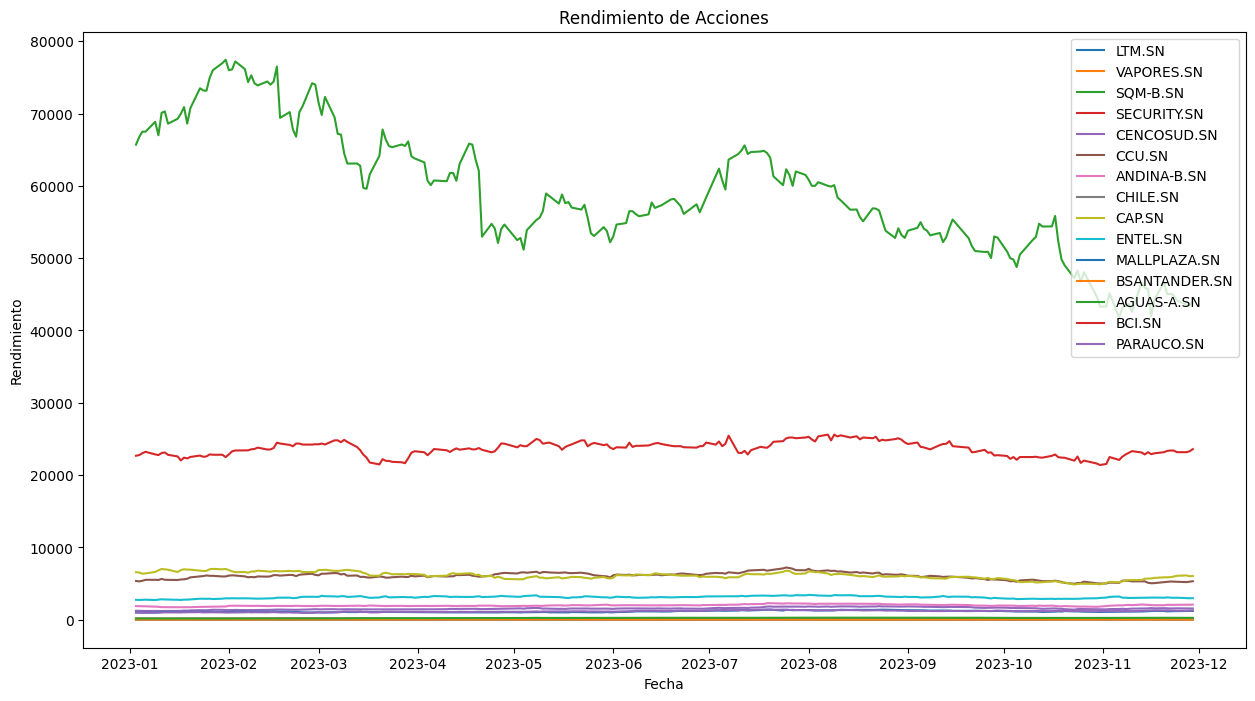

In [41]:
# Graficar series temporales para el período de predicción
graficar_series_temporales(stock_precio_prediccion, portafolio)


In [42]:
# Simulación de rendimientos y riesgos para el período de predicción
num_simulaciones_prediccion = 100
simulaciones_prediccion = np.random.multivariate_normal(
    esperados_stock_retorno_prediccion, 
    stock_retorno_cov_matriz_prediccion, 
    num_simulaciones_prediccion
)
simulacion_rendimientos_prediccion = np.dot(simulaciones_prediccion, portafolio_optimo.transpose())
simulacion_riesgos_prediccion = np.std(simulaciones_prediccion, axis=1)

In [43]:
# Crear DataFrame con simulaciones para el período de predicción
df_prediccion = pd.DataFrame({
    'Rendimientos': simulacion_rendimientos_prediccion.ravel(),
    'Riesgos': simulacion_riesgos_prediccion.ravel(),
})

In [44]:
# Calcular y mostrar métricas adicionales para el período de predicción (Sharpe Ratio, R2, MAE)
sharpe_ratio_prediccion = (retorno_esperado_optimo - 0.03) / portafolio_optimo_riesgo
r2_prediccion = np.corrcoef(
    simulacion_rendimientos_prediccion.flatten(),
    df_prediccion['Rendimientos'].values.flatten()
)[0, 1] ** 2
mae_prediccion = median_absolute_error(
    simulacion_rendimientos_prediccion.flatten(),
    df_prediccion['Rendimientos'].values.flatten()
)

print('\nMétricas adicionales para el período de predicción:')
print(f'Sharpe Ratio: {sharpe_ratio_prediccion:.4f}')
print(f'R2: {r2_prediccion:.4f}')
print(f'MAE: {mae_prediccion:.4f}')


Métricas adicionales para el período de predicción:
Sharpe Ratio: 0.7097
R2: 1.0000
MAE: 0.0000


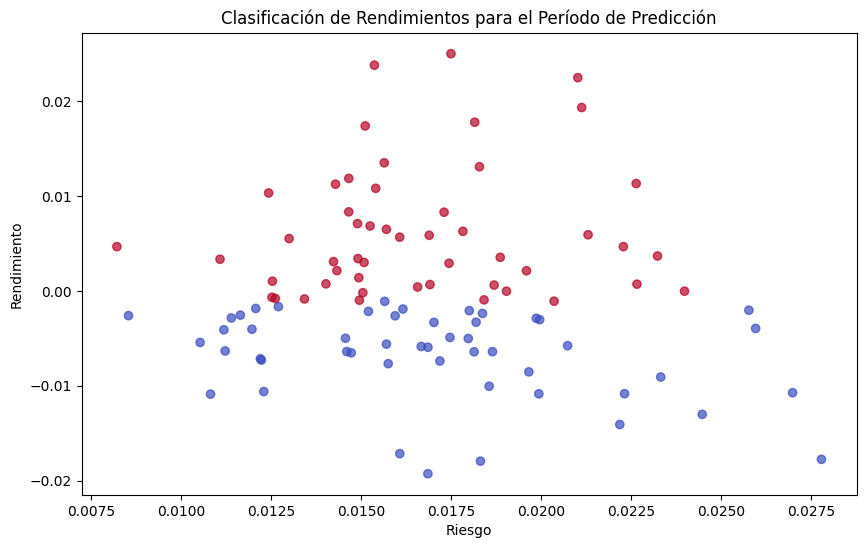

In [45]:
# Visualizar la clasificación de rendimientos para el período de predicción
df_prediccion['Clasificacion'] = np.where(
    df_prediccion['Rendimientos'] > df_prediccion['Rendimientos'].median(), 1, 0
)

plt.figure(figsize=(10, 6))
plt.scatter(
    df_prediccion['Riesgos'],
    df_prediccion['Rendimientos'],
    c=df_prediccion['Clasificacion'],
    cmap='coolwarm',
    alpha=0.7
)
plt.title('Clasificación de Rendimientos para el Período de Predicción')
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento')
plt.show()


In [46]:
# Comparar predicciones con datos reales para el período de predicción
df_prediccion['Clasificacion_real'] = np.where(
    stock_retorno_prediccion[portafolio[0]][:len(df_prediccion)] > stock_retorno_prediccion[portafolio[0]].median(), 1, 0
)

# Calcular porcentaje de certeza para el período de predicción
porcentaje_certeza_prediccion = (df_prediccion['Clasificacion'] == df_prediccion['Clasificacion_real']).mean() * 100

# Calcular grado de acierto para el período de predicción
aciertos_prediccion = np.sum(
    (df_prediccion['Clasificacion'] == df_prediccion['Clasificacion_real']).values & (df_prediccion['Clasificacion_real'] == 1).values
)
total_positivos_reales_prediccion = np.sum(df_prediccion['Clasificacion_real'] == 1)
grado_acierto_prediccion = aciertos_prediccion / total_positivos_reales_prediccion if total_positivos_reales_prediccion != 0 else 0

# Mostrar resultados para el período de predicción
print(f"\nPorcentaje de certeza entre las predicciones y los datos reales para el período de predicción: {porcentaje_certeza_prediccion:.2f}%")
print(f"Grado de acierto para el período de predicción: {grado_acierto_prediccion:.2f}")


Porcentaje de certeza entre las predicciones y los datos reales para el período de predicción: 54.00%
Grado de acierto para el período de predicción: 0.54


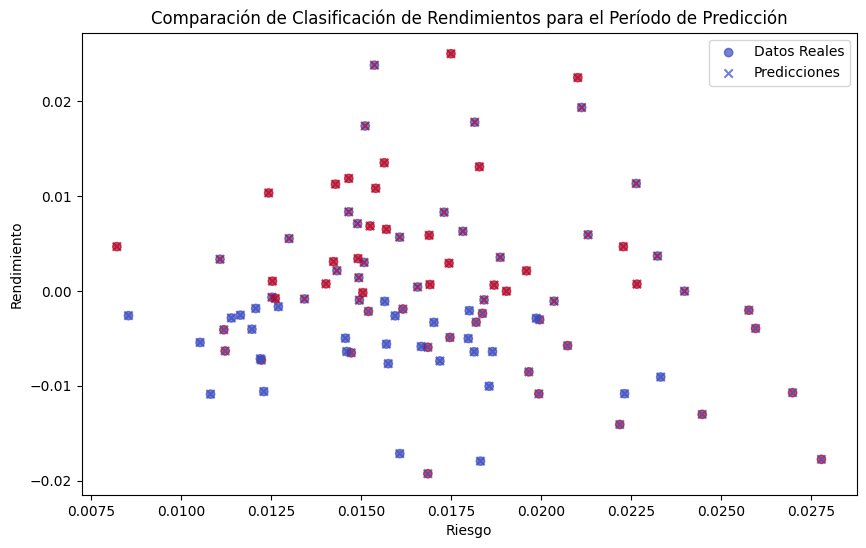

In [47]:
# Comparar predicciones con datos reales para el período de predicción
plt.figure(figsize=(10, 6))
plt.scatter(
    df_prediccion['Riesgos'],
    df_prediccion['Rendimientos'],
    c=df_prediccion['Clasificacion_real'],
    cmap='coolwarm',
    alpha=0.7,
    label='Datos Reales'
)
plt.scatter(
    df_prediccion['Riesgos'],
    df_prediccion['Rendimientos'],
    c=df_prediccion['Clasificacion'],
    marker='x',
    cmap='coolwarm',
    alpha=0.7,
    label='Predicciones'
)
plt.title('Comparación de Clasificación de Rendimientos para el Período de Predicción')
plt.xlabel('Riesgo')
plt.ylabel('Rendimiento')
plt.legend()
plt.show()